In [ ]:
from hierarchy_transformers import HierarchyTransformer

model = HierarchyTransformer.from_pretrained('Hierarchy-Transformers/HiT-MiniLM-L12-WordNetNoun')

# entity names to be encoded.
entity_names = ["computer", "personal computer", "fruit", "berry"]

# get the entity embeddings
entity_embeddings = model.encode(entity_names)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

In [7]:
model.to('mps')

HierarchyTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [17]:
child_entity_embeddings = model.encode(["personal computer", "berry"], convert_to_tensor=True)
parent_entity_embeddings = model.encode(["computer", "fruit"], convert_to_tensor=True)

# compute the hyperbolic distances and norms of entity embeddings
dists = model.manifold.dist(child_entity_embeddings, parent_entity_embeddings)
child_norms = model.manifold.dist0(child_entity_embeddings)
parent_norms = model.manifold.dist0(parent_entity_embeddings)

# use the empirical function for subsumption prediction proposed in the paper
# `centri_score_weight` and the overall threshold are determined on the validation set
# wtf does that mean?
subsumption_scores = - (dists + 0.5 * (parent_norms - child_norms))

In [18]:
subsumption_scores

tensor([-5.0719, -6.0575], device='mps:0')

/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_61180/2300316233.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


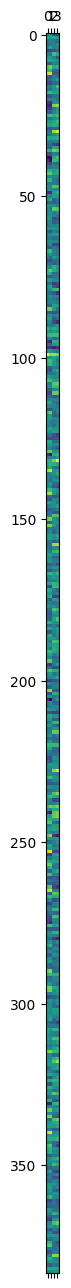

In [16]:
import matplotlib.pyplot as plt
plt.matshow(entity_embeddings.T)
plt.tight_layout()